In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

with open("COVID-19/dati-json/dpc-covid19-ita-andamento-nazionale.json", "r") as jsonData:
    data = jsonData.read()
    
andamenti = json.loads(data)

<ipython-input-4-6ccf004f093e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tamponi_giornalieri'] = df['tamponi'].diff()
<ipython-input-4-6ccf004f093e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pos%'] = df1['nuovi_positivi']/df1['tamponi_giornalieri']


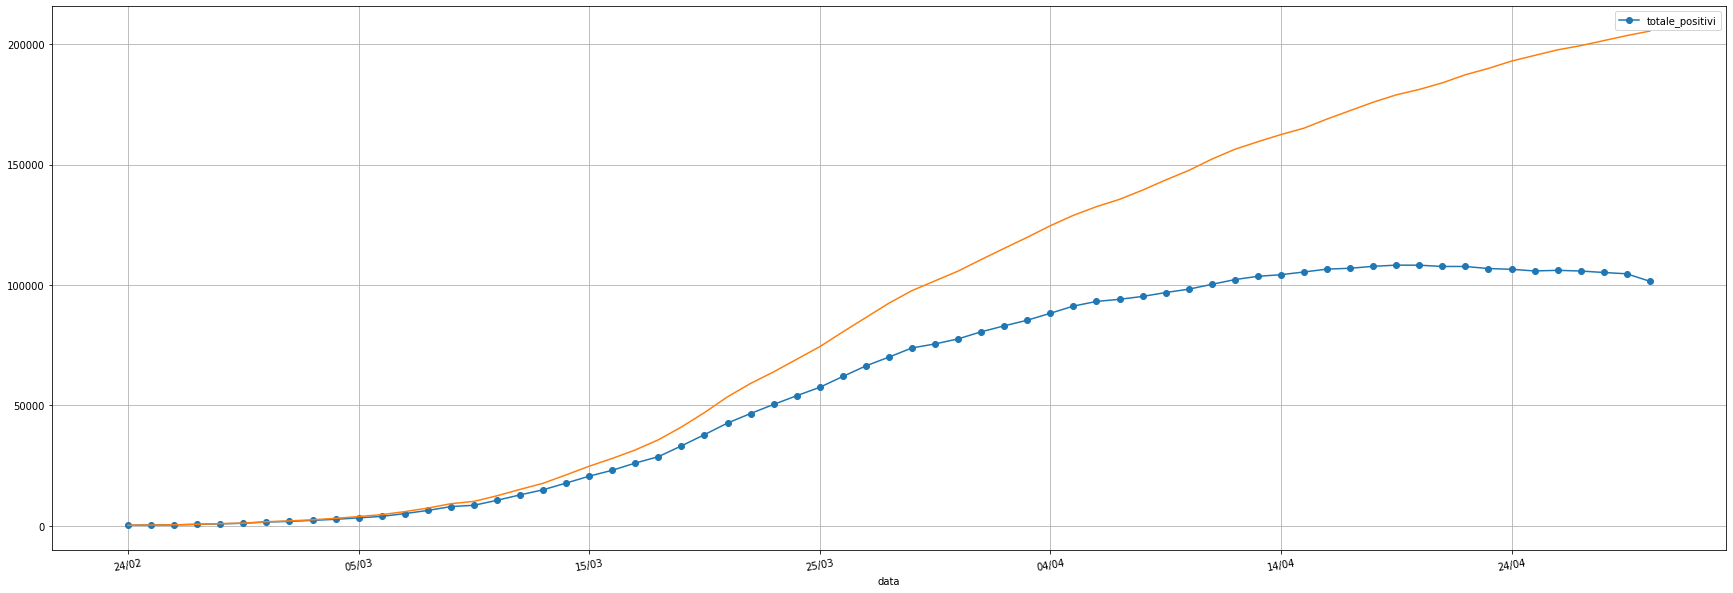

<Figure size 432x288 with 0 Axes>

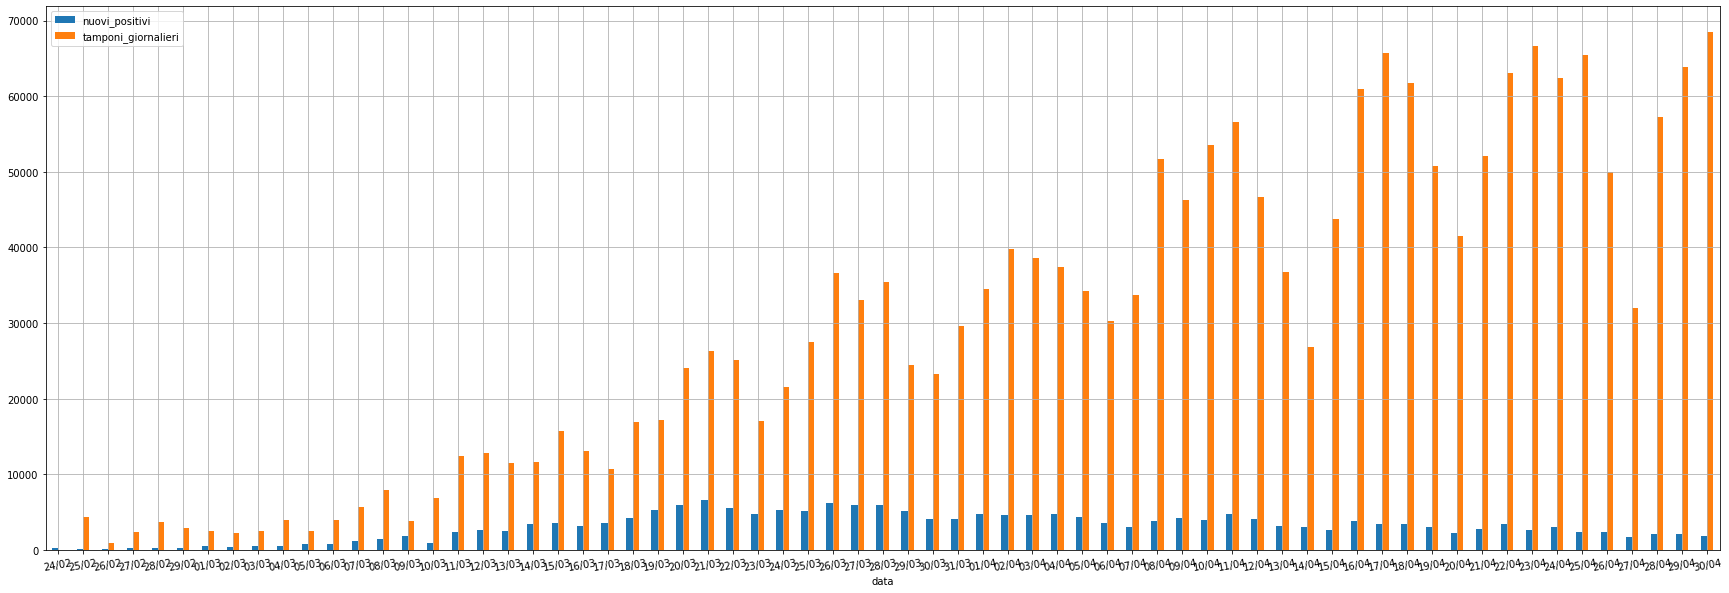

<Figure size 432x288 with 0 Axes>

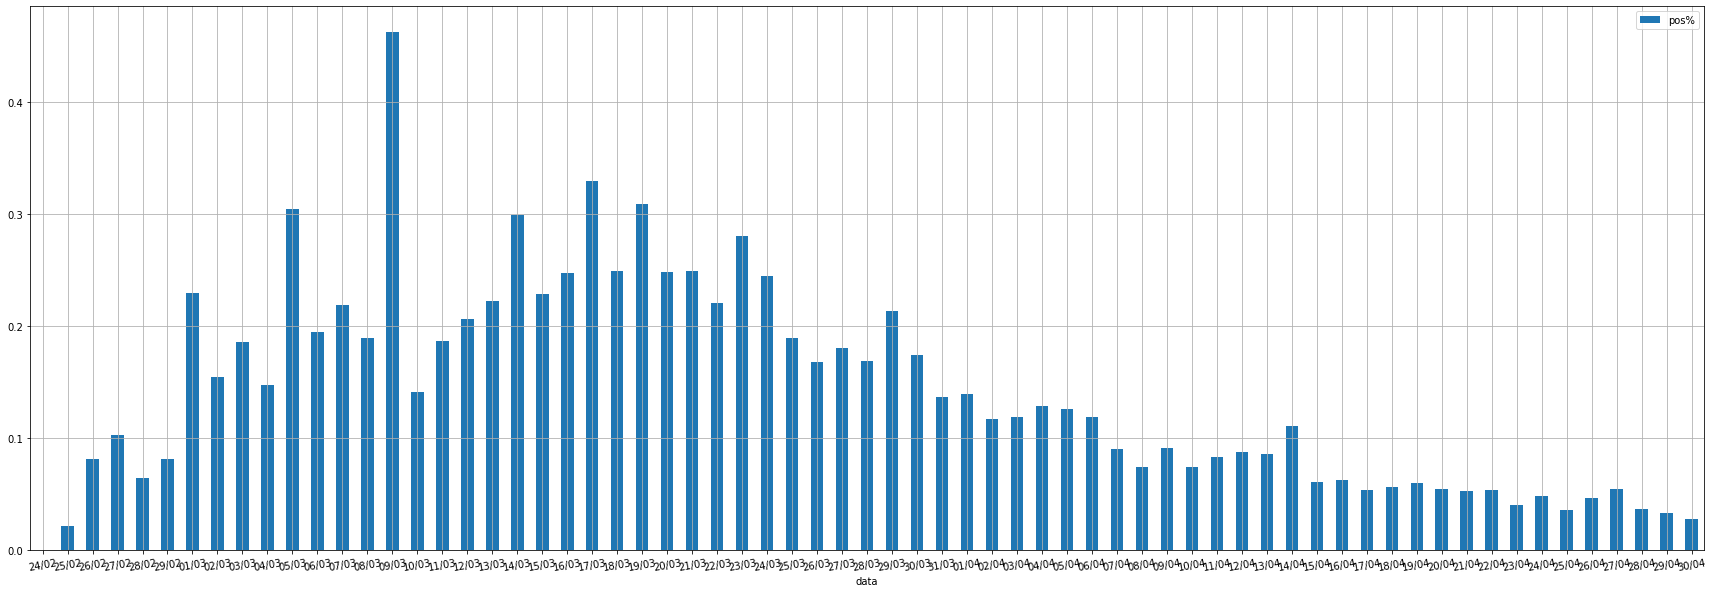

In [4]:
columns = ['data', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi']

dati = {col: [] for col in columns}

for andamento in andamenti:
    for col in columns:
        dati[col].append(andamento[col])
        
df = pd.DataFrame(dati)
df["data"] = pd.to_datetime(df["data"], infer_datetime_format=True)
df["data"] = df["data"].dt.strftime("%d/%m")

df1 = df[['data', 'nuovi_positivi']]
df1['tamponi_giornalieri'] = df['tamponi'].diff()
df1['pos%'] = df1['nuovi_positivi']/df1['tamponi_giornalieri']

df.plot(kind="line", x="data", y="totale_positivi", grid=True, figsize=(30,10), rot=10, marker='o')
plt.plot(df['data'], df['totale_casi'])
plt.savefig("curva-epidemia.png")
plt.figure()
df1.plot(kind="bar", x="data", y=['nuovi_positivi', 'tamponi_giornalieri'], grid=True, figsize=(30,10), rot=10)
plt.savefig("tamponi-giornalieri.png")
plt.figure()
df1.plot(kind="bar", x="data", y='pos%', grid=True, figsize=(30,10), rot=10)

In [34]:
medie = df1.mean(axis=0, numeric_only=True)

perc_pos_tamp_unit = df['totale_casi'].iloc[-1]/df['casi_testati'].iloc[-1]
print(perc_pos_tamp_unit)
print(medie)

0.1611664593632836
nuovi_positivi          3115.718750
tamponi_giornalieri    28338.698413
pos%                       0.150021
dtype: float64


In [88]:
import numpy as np

x_seq = np.arange(df["data"].size)
fit = np.polyfit(x_seq, df["totale_positivi"], 1)
fit_fn = np.poly1d(fit)

print('Slope = ', fit[0], ", ","Intercept = ", fit[1])
print(fit_fn)

Slope =  2221.495924908425 ,  Intercept =  -12855.371634615356
 
2221 x - 1.286e+04


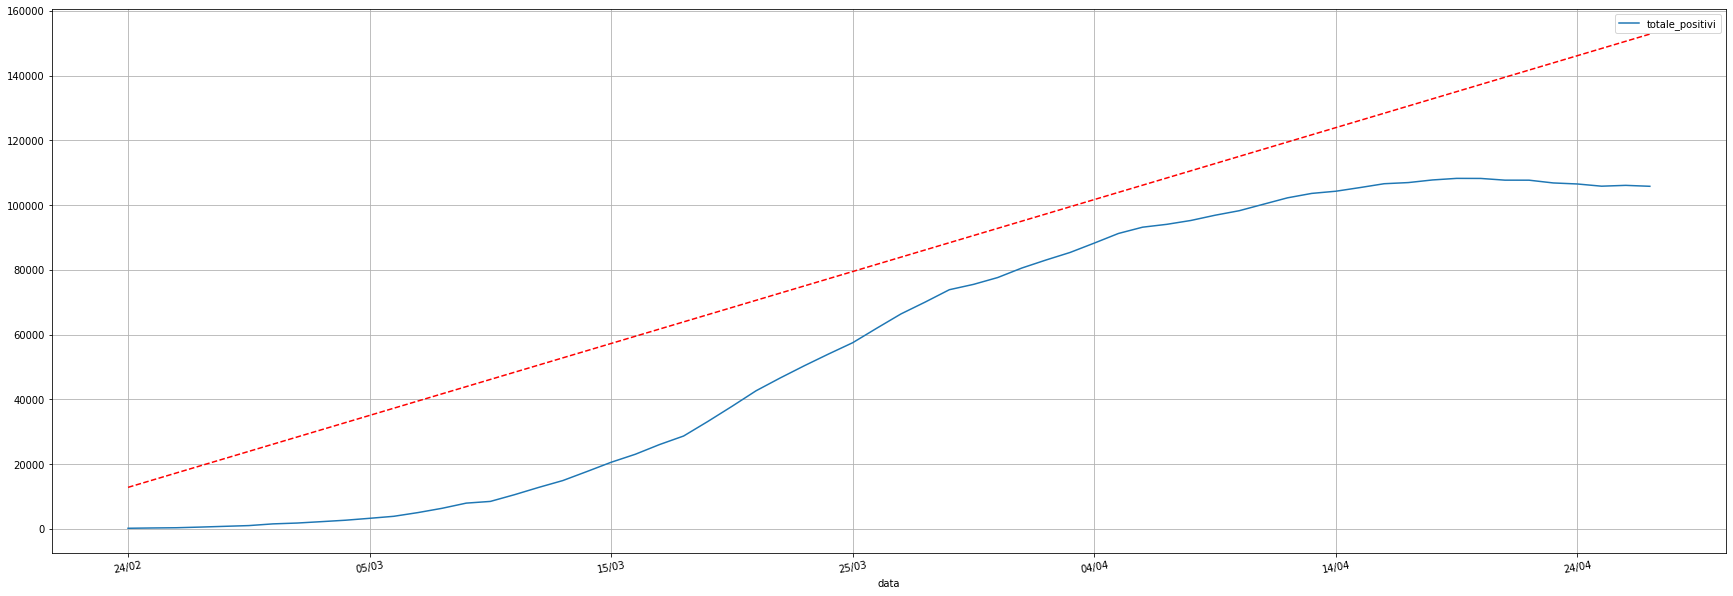

In [95]:
x = np.arange(df['data'].size)

fx = fit[0] * x - fit[1]
df.plot(kind="line", x="data", y="totale_positivi", grid=True, figsize=(30,10), rot=10)
plt.plot(df['data'],fx, 'r--')

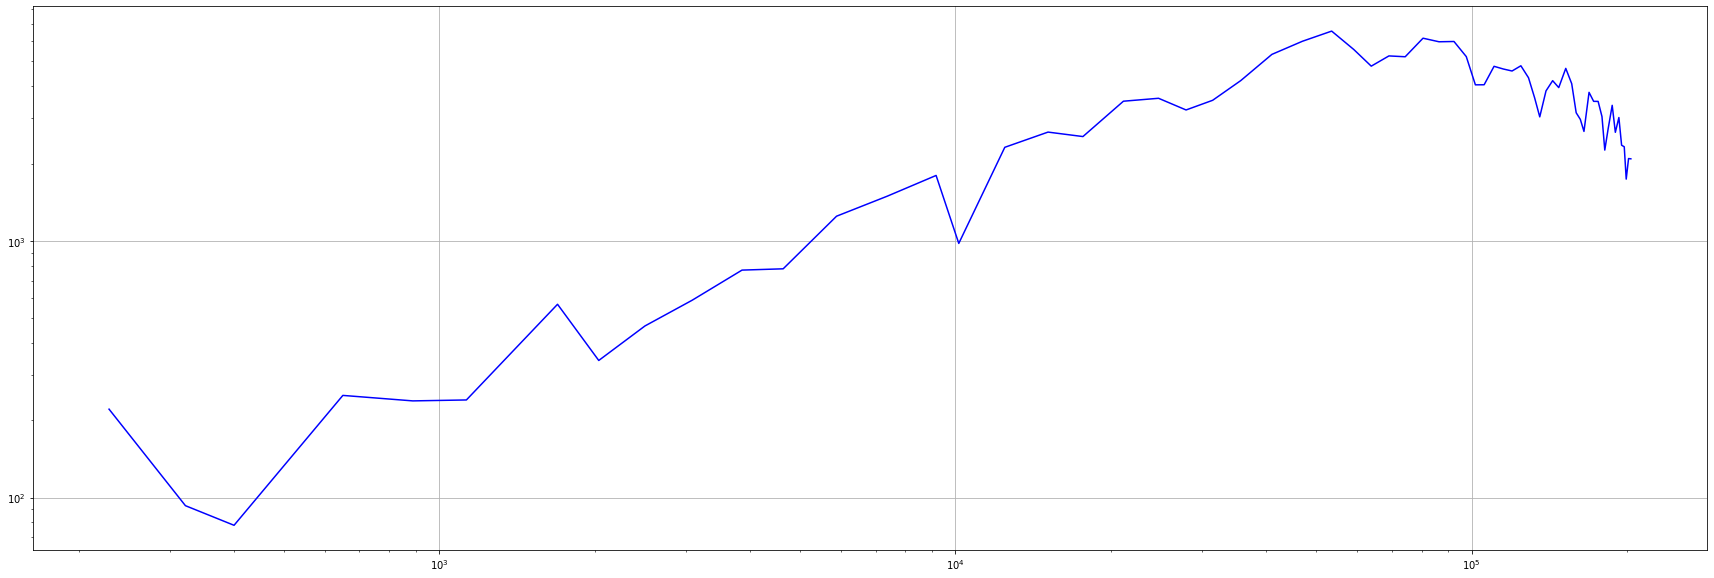

In [7]:
plt.figure(figsize=(30,10))
plt.plot(df['totale_casi'], df['nuovi_positivi'], 'b')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.savefig("curva-logaritmica.png")